# Curso de Estatística

## Importando bibliotecas

In [63]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats

dados = pd.read_csv('dados/dados.csv')

## Quantitativa discreta
### quando representa anos completos (numeros inteiros)
## Quantitativa contínua
### quando representa a idade exata, sendo representado por fraçoes de anos;
## Qualitativa ordinal
### QUando representa faixas de idade

In [2]:
sorted(dados['Anos de Estudo'].unique())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]

In [3]:
dados.Sexo.value_counts(normalize=True)*100

0    69.299844
1    30.700156
Name: Sexo, dtype: float64

In [4]:
frequencia = dados['Sexo'].value_counts()
percentual = dados.Sexo.value_counts(normalize=True)*100

dist_freq_qualitativas = pd.DataFrame({'Frequência': frequencia, 'Porcentagem (%)': percentual})

In [5]:
# dist_freq_qualitativas.rename(index = {0: 'Masculino', 1: 'Feminino'}, inplace = True)
dist_freq_qualitativas.rename_axis('Sexo', axis='columns', inplace=True)


## Distribuição de Frequências

In [6]:
sexo = {0: 'Masculino', 1: 'Feminino'}
cor = {0: 'Indígena', 2: 'Branca', 4: 'Preta', 6: 'Amarela', 8: 'Parda', 9: 'Sem Declaração'}

In [7]:
frequencia = pd.crosstab(dados.Sexo, dados.Cor)
frequencia.rename(index=sexo, inplace=True)
frequencia.rename(columns=cor, inplace=True)
frequencia

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,256,22194,5502,235,25063
Feminino,101,9621,2889,117,10862


In [8]:
# por porcentagem
frequencia = pd.crosstab(dados.Sexo, dados.Cor, normalize=True)*100
frequencia.rename(index=sexo, inplace=True)
frequencia.rename(columns=cor, inplace=True)
frequencia


Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,0.333160,28.883394,7.160333,0.305830,32.617126
Feminino,0.131442,12.520822,3.759761,0.152264,14.135867


In [9]:
frequencia = pd.crosstab(dados.Sexo, dados.Cor, aggfunc='mean', values=dados.Renda)
frequencia.rename(index=sexo, inplace=True)
frequencia.rename(columns=cor, inplace=True)
frequencia

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,1081.710938,2925.744435,1603.861687,4758.251064,1659.577425
Feminino,2464.386139,2109.866750,1134.596400,3027.341880,1176.758516


## Distribuição de frequências para variáveis quantitativas

In [10]:
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


In [11]:
#dados.Renda.max() e dados.Renda.min()
classes = [0, 1576, 3152, 7880, 15760, 200000]
labels = ['E', 'D', 'C', 'B', 'A']

# pd.cut(x=dados.Renda, 
#       bins=classes,
#       labels=labels,
#       include_lowest=True)

frequencia = pd.value_counts(
pd.cut(x=dados.Renda, 
      bins=classes,
      labels=labels,
      include_lowest=True))

percentual = pd.value_counts(
pd.cut(x=dados.Renda,
      bins=classes,
      labels=labels,
      include_lowest=True),
normalize=True)

dist_freq_quantitaivas_personalizadas =  pd.DataFrame({'Frequência': frequencia, 'Porcentagem (%)': percentual})
dist_freq_quantitaivas_personalizadas.sort_index(ascending=False, inplace=True)

In [12]:
dist_freq_quantitaivas_personalizadas

,Frequência,Porcentagem (%)
A,608,0.007913
B,2178,0.028345
C,7599,0.098894
D,16700,0.217335
E,49755,0.647514


## Regra de Sturges

In [13]:
n = dados.shape[0]
k = 1 + (10/3) + np.log10(n)
k = k.round(0)

In [14]:
frequencia = pd.value_counts(
pd.cut(x=dados.Renda,
      bins=17,
      include_lowest=True),
sort=False)

percentual = pd.value_counts(
pd.cut(x=dados.Renda,
      bins=17,
      include_lowest = True),
sort=False,
normalize=True)

In [15]:
dist_freq_quantitativas_amplitude_fixa = pd.DataFrame({'Frequência': frequencia, 'Percentual (%)': percentual})

In [16]:
dist_freq_quantitativas_amplitude_fixa

,Frequência,Percentual (%)
"(-200.001, 11764.706]",75594,0.983784
"(11764.706, 23529.412]",1022,0.013300
"(23529.412, 35294.118]",169,0.002199
"(35294.118, 47058.824]",19,0.000247
"(47058.824, 58823.529]",16,0.000208
"(58823.529, 70588.235]",5,0.000065
"(70588.235, 82352.941]",4,0.000052
"(82352.941, 94117.647]",1,0.000013
"(94117.647, 105882.353]",6,0.000078
"(105882.353, 117647.059]",0,0.000000


## Histograma

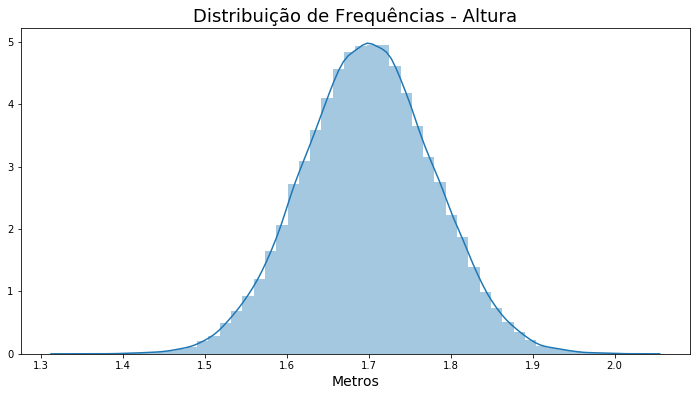

In [17]:
ax = sns.distplot(dados.Altura, kde=True)
ax.figure.set_size_inches(12,6)
ax.set_title('Distribuição de Frequências - Altura', fontsize=18)
ax.set_xlabel('Metros', fontsize=14)
ax

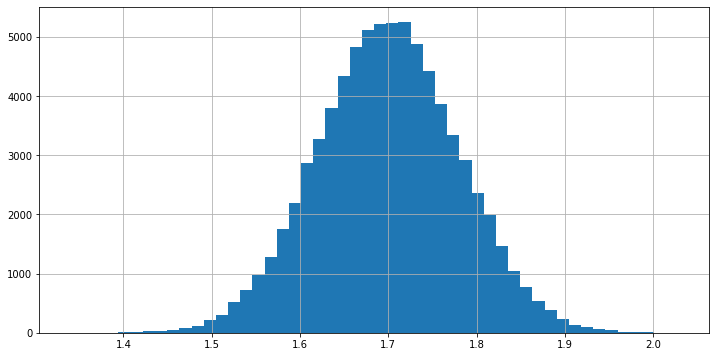

In [18]:
dados.Altura.hist(bins=50, figsize = (12,6))

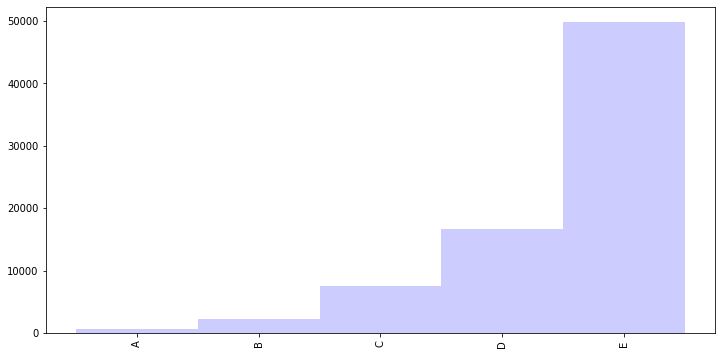

In [19]:
dist_freq_quantitaivas_personalizadas['Frequência'].plot.bar(width=1, color='blue', alpha=0.2, figsize=(12,6))

## Medias de tendência central

### Média

In [20]:
dataset = pd.DataFrame({
    'Sexo': ['H', 'M', 'M', 'M', 'M', 'H', 'H', 'H', 'M', 'M'],
    'Idade': [53, 72, 54, 27, 30, 40, 58, 32, 44, 51]
})

In [21]:
#pd.DataFrame(dataset.groupby('Sexo').mean().loc['H'])

### Mediana

In [22]:
dados.Renda.median()

1200.0

In [23]:
dados.Renda.quantile?

### Moda

In [24]:
dados['Altura'].mode()

0    1.568128
1    1.671225
2    1.681659
3    1.692977
4    1.708163
5    1.708370
6    1.753842
7    1.779073
8    1.796462
dtype: float64

### Relação entre média, mediana e moda

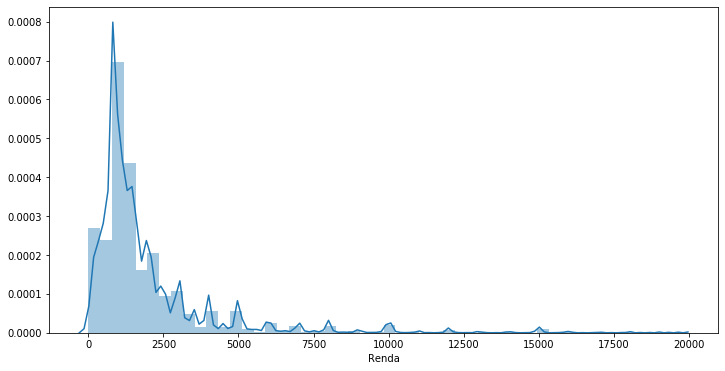

In [25]:
ax = sns.distplot(dados.query('Renda < 20000').Renda)
ax.figure.set_size_inches(12,6)
ax

In [26]:
Moda = dados.Renda.mode()
Mediana = dados.Renda.median()
Media = dados.Renda.mean()

(Moda < Mediana) < Media

0    True
dtype: bool

### Analisando a Altura

In [27]:
Moda = dados.Altura.mode()
Mediana =dados.Altura.median()
Media = dados.Altura.mean()

In [28]:
Moda

0    1.568128
1    1.671225
2    1.681659
3    1.692977
4    1.708163
5    1.708370
6    1.753842
7    1.779073
8    1.796462
dtype: float64

## Medidas Separatrizes

### Quartis, decis e percentis

In [29]:
dados.Renda.quantile([0.25,0.5,0.75])

0.25     788.0
0.50    1200.0
0.75    2000.0
Name: Renda, dtype: float64

In [30]:
dados.Renda.quantile([i/10 for i in range(1,10)])

0.1     350.0
0.2     788.0
0.3     800.0
0.4    1000.0
0.5    1200.0
0.6    1500.0
0.7    1900.0
0.8    2500.0
0.9    4000.0
Name: Renda, dtype: float64

In [31]:
dados.Renda.quantile([i/100 for i in range(1,100)])

0.01        0.0
0.02        0.0
0.03        0.0
0.04       50.0
0.05      100.0
         ...   
0.95     6000.0
0.96     7000.0
0.97     8000.0
0.98    10000.0
0.99    15000.0
Name: Renda, Length: 99, dtype: float64

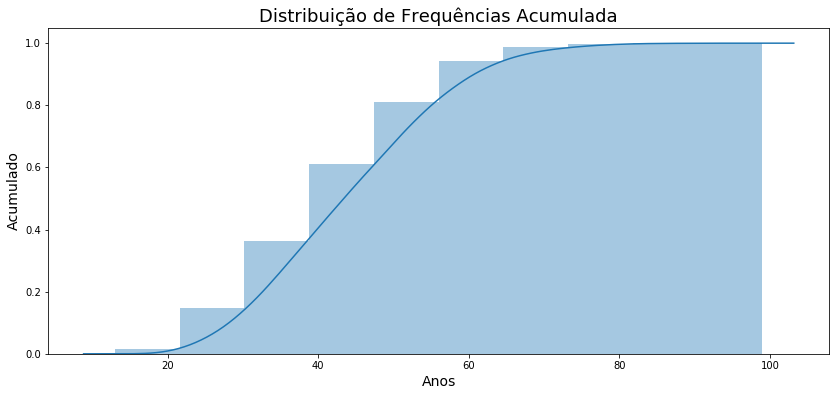

In [32]:
ax = sns.distplot(dados.Idade,
                  hist_kws={'cumulative': True}, 
                  kde_kws={'cumulative': True},
                 bins=10)
ax.figure.set_size_inches(14,6)
ax.set_title('Distribuição de Frequências Acumulada', fontsize=18)
ax.set_ylabel('Acumulado', fontsize=14)
ax.set_xlabel('Anos', fontsize=14)
ax

## Box-plot

In [33]:
ax = sns.boxplot(x='Altura', y='Sexo', data = dados)
ax.figure.set_size_inches(12, 6)
ax.set_title('Altura', fontsize=18)
ax.set_xlabel('Metros', fontsize=14)
ax

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000001E234E668B8> (for post_execute):


KeyboardInterrupt: 

In [ ]:
ax = sns.boxplot(x='Renda', y='Sexo', data = dados, orient = 'h')
ax.figure.set_size_inches(12, 6)
ax.set_title('Renda', fontsize=18)
ax.set_xlabel('R$', fontsize=14)
ax

In [ ]:
ax = sns.boxplot(x='Anos de Estudo', y='Sexo', data = dados)
ax.figure.set_size_inches(12, 6)
ax.set_title('Anos de Estudo', fontsize=18)
ax.set_xlabel('ANnos', fontsize=14)
ax

## Desvio médio absoluto

In [4]:
df = pd.DataFrame(data = {'Fulano': [8, 10, 4, 8, 6, 10, 8],
                          'Sicrano': [7.5, 8, 7, 8, 8, 8.5, 7]}, 
                  index = ['Matemática', 
                           'Português', 
                           'Inglês', 
                           'Geografia', 
                           'História', 
                           'Física', 
                           'Química'])
df.rename_axis('Matérias', axis = 'columns', inplace = True)
df

Matérias,Fulano,Sicrano
Matemática,8,7.5
Português,10,8.0
Inglês,4,7.0
Geografia,8,8.0
História,6,8.0
Física,10,8.5
Química,8,7.0


In [5]:
df.mad()

Matérias
Fulano     1.551020
Sicrano    0.469388
dtype: float64

## Variância

In [9]:
dataset = pd.DataFrame({
    'Sexo': ['H', 'M', 'M', 'M', 'M', 'H', 'H', 'H', 'M', 'M'],
    'Idade': [53, 72, 54, 27, 30, 40, 58, 32, 44, 51]
})

In [17]:
dataset.groupby('Sexo').std().loc['M']


Idade    16.64532
Name: M, dtype: float64

In [2]:
dados

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631
...,...,...,...,...,...,...,...
76835,53,1,46,2,11,812,1.687030
76836,53,0,30,4,7,1500,1.792934
76837,53,0,32,8,12,1300,1.830587
76838,53,0,57,8,4,1500,1.726344


## Análise Projeto Final

In [33]:
classes = [
    dados.Renda.min(),
    2*788,
    5*788,
    15*788,
    25*788,
    dados.Renda.max()
]
labels = ['E','D','C','B','A']

frequencia = pd.value_counts(
pd.cut(x=dados.Renda,
      bins=classes,
      labels=labels,
      include_lowest=True))

percentual = pd.value_counts(
pd.cut(x=dados.Renda,
      bins=classes,
      labels=labels,
      include_lowest=True),
normalize=True)*100

dist_freq_renda = pd.DataFrame({'Frequência': frequencia, 'Porcentagem(%)': percentual})
dist_freq_renda.sort_index(ascending=False, inplace=  True)
dist_freq_renda

sexo = {
    0: 'Masculino', 
    1: 'Feminino'
}
cor = {
    0: 'Indígena', 
    2: 'Branca', 
    4: 'Preta', 
    6: 'Amarela', 
    8: 'Parda', 
    9: 'Sem declaração'
}
anos_de_estudo = {
    1: 'Sem instrução e menos de 1 ano', 
    2: '1 ano', 
    3: '2 anos', 
    4: '3 anos', 
    5: '4 anos', 
    6: '5 anos', 
    7: '6 anos', 
    8: '7 anos', 
    9: '8 anos', 
    10: '9 anos', 
    11: '10 anos', 
    12: '11 anos', 
    13: '12 anos', 
    14: '13 anos', 
    15: '14 anos', 
    16: '15 anos ou mais', 
    17: 'Não determinados'
}
uf = {
    11: 'Rondônia', 
    12: 'Acre', 
    13: 'Amazonas', 
    14: 'Roraima', 
    15: 'Pará', 
    16: 'Amapá', 
    17: 'Tocantins', 
    21: 'Maranhão', 
    22: 'Piauí', 
    23: 'Ceará', 
    24: 'Rio Grande do Norte', 
    25: 'Paraíba', 
    26: 'Pernambuco', 
    27: 'Alagoas', 
    28: 'Sergipe', 
    29: 'Bahia', 
    31: 'Minas Gerais', 
    32: 'Espírito Santo', 
    33: 'Rio de Janeiro', 
    35: 'São Paulo', 
    41: 'Paraná', 
    42: 'Santa Catarina', 
    43: 'Rio Grande do Sul', 
    50: 'Mato Grosso do Sul', 
    51: 'Mato Grosso', 
    52: 'Goiás', 
    53: 'Distrito Federal'
}

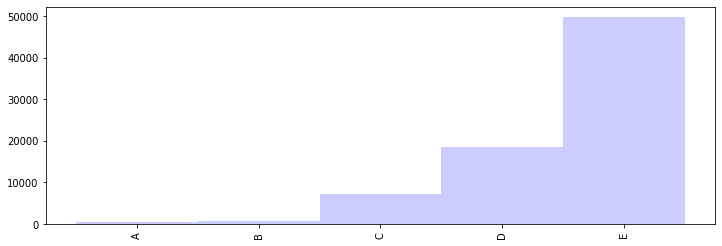

In [34]:
# Grafico de barras para visualizar as informações da tabela de frequências acima
dist_freq_renda['Frequência'].plot.bar(width=1, color='blue', alpha=0.2, figsize=(12,4))

### Conclusões:

## Análise Idade

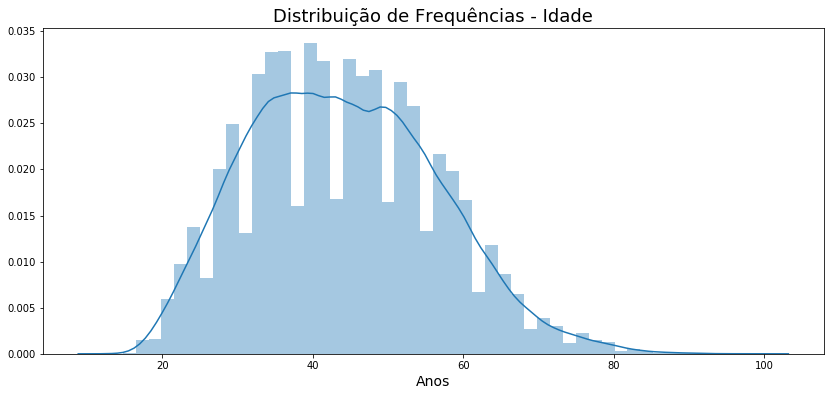

In [35]:
ax = sns.distplot(dados.Idade)
ax.figure.set_size_inches(14,6)
ax.set_title('Distribuição de Frequências - Idade', fontsize=18)
ax.set_xlabel('Anos', fontsize=14)
ax

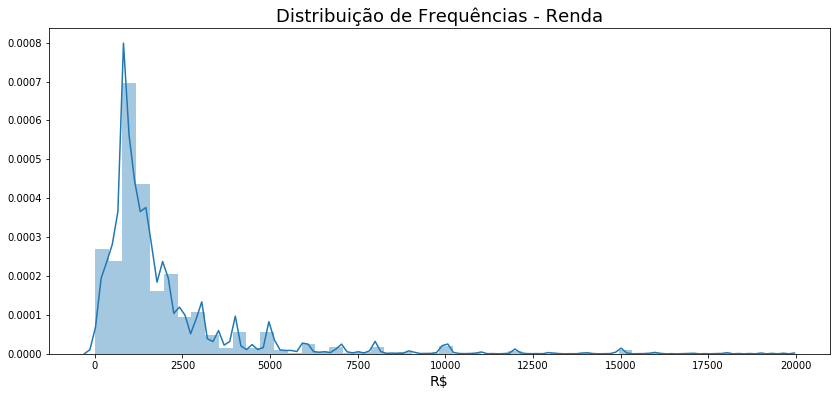

In [32]:
ax = sns.distplot(dados.query('Renda < 20000').Renda)
ax.figure.set_size_inches(14,6)
ax.set_title('Distribuição de Frequências - Renda', fontsize=18)
ax.set_xlabel('R$', fontsize=14)
ax

In [37]:
# Sexo e Cor - Quantidade
frequencia = pd.crosstab(dados.Sexo, dados.Cor)
frequencia.rename(index=sexo, inplace=True)
frequencia.rename(columns=cor, inplace=True)
frequencia

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,256,22194,5502,235,25063
Feminino,101,9621,2889,117,10862


In [38]:
# Sexo e Cor - Percentual
frequencia = pd.crosstab(dados.Sexo, dados.Cor, normalize=True)*100
frequencia.rename(index=sexo, inplace=True)
frequencia.rename(columns=cor, inplace=True)
frequencia

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,0.333160,28.883394,7.160333,0.305830,32.617126
Feminino,0.131442,12.520822,3.759761,0.152264,14.135867


In [40]:
# Renda Média
dados.Renda.mean()

2000.3831988547631

In [41]:
dados.Renda.median()

1200.0

In [44]:
dados.Renda.mode()[0]

788

In [45]:
# Desvio médio absoluto
dados.Renda.mad()

1526.4951371644931

In [46]:
# Variância
dados.Renda.var()

11044906.00622118

In [47]:
# Desvio Padrão
dados.Renda.std()

3323.3877303470294

In [52]:
# Média, mediana e valor máximo da variável Renda, segundo Sexo e Cor
renda_estatisticas_por_sexo_e_cor = pd.crosstab(dados.Cor,
                                               dados.Sexo,
                                               values=dados.Renda,
                                               aggfunc = {'mean', 'median', 'max'})
renda_estatisticas_por_sexo_e_cor.rename(index=cor, inplace=True)
renda_estatisticas_por_sexo_e_cor.rename(columns=sexo, inplace=True)
renda_estatisticas_por_sexo_e_cor

max                   mean                 median         
Sexo     Masculino  Feminino    Masculino     Feminino Masculino Feminino
Cor                                                                      
Indígena   10000.0  120000.0  1081.710938  2464.386139     797.5    788.0
Branca    200000.0  100000.0  2925.744435  2109.866750    1700.0   1200.0
Preta      50000.0   23000.0  1603.861687  1134.596400    1200.0    800.0
Amarela    50000.0   20000.0  4758.251064  3027.341880    2800.0   1500.0
Parda     100000.0   30000.0  1659.577425  1176.758516    1200.0    800.0

In [54]:
# Medidas de dispersão da variável Renda por sexo e cor
renda_dispersao_por_sexo_e_cor = pd.crosstab(dados.Cor,
                                            dados.Sexo,
                                            aggfunc = {'mad', 'var', 'std'},
                                            values=dados.Renda).round(2)
renda_dispersao_por_sexo_e_cor.rename(index=cor, inplace=True)
renda_dispersao_por_sexo_e_cor.rename(columns=sexo, inplace=True)
renda_dispersao_por_sexo_e_cor

mad                std                    var              
Sexo     Masculino Feminino Masculino  Feminino    Masculino      Feminino
Cor                                                                       
Indígena    798.91  3007.89   1204.09  11957.50   1449841.13  1.429818e+08
Branca     2261.01  1670.97   4750.79   3251.01  22570023.41  1.056909e+07
Preta       975.60   705.45   1936.31   1349.80   3749293.59  1.821960e+06
Amarela    3709.60  2549.15   5740.82   3731.17  32957069.62  1.392166e+07
Parda      1125.83   811.58   2312.09   1596.23   5345747.15  2.547960e+06

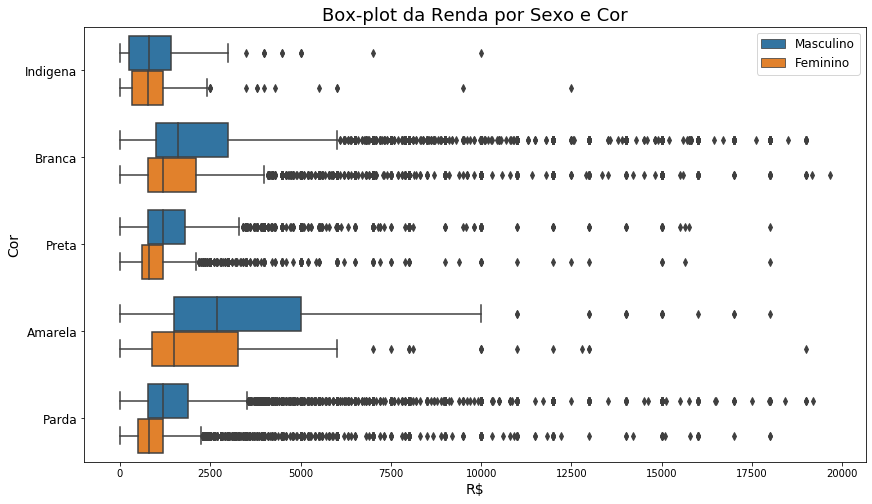

In [62]:
#Box plot da variável Renda, segundo Sexo e Cor
ax = sns.boxplot(x='Renda', y='Cor', hue='Sexo', data=dados.query('Renda<20000'), orient='h')
ax.figure.set_size_inches(14,8)
ax.set_title('Box-plot da Renda por Sexo e Cor', fontsize=18)
ax.set_xlabel('R$', fontsize=14)
ax.set_ylabel('Cor', fontsize=14)
ax.set_yticklabels(['Indigena', 'Branca', 'Preta', 'Amarela', 'Parda', 'Sem declaração'], fontsize=12)

# Configuração de legenda de gráficos
handles,_ = ax.get_legend_handles_labels()
ax.legend(handles, ['Masculino', 'Feminino'], fontsize=12)
ax

In [65]:
# Percentual de pessoas que ganham um salario minimo ou menos
percentual = stats.percentileofscore(dados.Renda, 788, kind='weak')
print("{0:.2f}%".format(percentual))

28.87%


In [66]:
#Qual o valor máximo ganho por 99% das pessoas de nosso dataset?
valor = dados.Renda.quantile(.99)
print("R$ {0:.2f}".format(valor))

R$ 15000.00


In [70]:
# Média, Mediana e Valor Máximo e desvio-padrao da renda segundao Anos de Estudoe Sexo
renda_estatisticas_por_sexo_e_estudo = pd.crosstab(dados['Anos de Estudo'],
                                                  dados.Sexo,
                                                  aggfunc = {'mean', 'median', 'max', 'std'},
                                                  values=dados.Renda).round(2)
renda_estatisticas_por_sexo_e_estudo.rename(index=anos_de_estudo, inplace=True)
renda_estatisticas_por_sexo_e_estudo.rename(columns=sexo, inplace=True)
renda_estatisticas_por_sexo_e_estudo

max                mean           \
Sexo                           Masculino  Feminino Masculino Feminino   
Anos de Estudo                                                          
Sem instrução e menos de 1 ano   30000.0   10000.0    799.49   516.20   
1 ano                            30000.0    2000.0    895.63   492.77   
2 anos                           40000.0    4000.0    931.18   529.91   
3 anos                           80000.0    3500.0   1109.20   546.85   
4 anos                           50000.0   10000.0   1302.33   704.28   
5 anos                           35000.0    8000.0   1338.65   781.39   
6 anos                           25000.0    6000.0   1448.88   833.73   
7 anos                           40000.0    9000.0   1465.50   830.75   
8 anos                           30000.0   18000.0   1639.40   933.62   
9 anos                           60000.0   20000.0   1508.04   868.02   
10 anos                          45000.0    6000.0   1731.27   925.92   
11 anos                         200000.0  100000.0   2117.06  1286.79   
12 anos                          30000.0  120000.0   2470.33  1682.31   
13 anos                          25000.0   20000.0   3195.10  1911.73   
14 anos                          50000.0   20000.0   3706.62  2226.46   
15 anos ou mais                 200000.0  100000.0   6134.28  3899.51   
Não determinados                  7000.0    3000.0   1295.76   798.17   

                                  median                std           
Sexo                           Masculino Feminino Masculino Feminino  
Anos de Estudo                                                        
Sem instrução e menos de 1 ano     700.0    390.0   1023.90   639.31  
1 ano                              788.0    400.0   1331.95   425.29  
2 anos                             788.0    450.0   1435.17   498.23  
3 anos                             800.0    500.0   2143.80   424.12  
4 anos                            1000.0    788.0   1419.82   629.55  
5 anos                            1045.0    788.0   1484.65   635.78  
6 anos                            1200.0    788.0   1476.63   574.55  
7 anos                            1200.0    788.0   1419.71   602.04  
8 anos                            1300.0    800.0   1515.58   896.78  
9 anos                            1200.0    788.0   2137.66   973.22  
10 anos                           1218.0    800.0   2078.61   620.61  
11 anos                           1500.0   1000.0   2676.54  1819.04  
12 anos                           1800.0   1200.0   2268.08  4851.83  
13 anos                           2400.0   1300.0   2797.12  2053.79  
14 anos                           2500.0   1600.0   3987.21  2064.08  
15 anos ou mais                   4000.0   2800.0   7447.61  4212.77  
Não determinados                  1200.0    788.0    979.65   459.99